<font size =5> <center> Customer Support Ticket Classification </center> </font>

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer

# Load your data
df = pd.read_csv("customer_emails.csv")
df['category_num'] = df['category'].map({
    'low': 0, 
    'medium': 1, 
    'high': 2
})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df.email_text, 
    df.category_num, 
    test_size=0.2,
    random_state=2022,
    stratify=df.category_num
)

# Create a custom transformer for SentenceTransformers
class SentenceTransformerVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2'):# Smaller, faster model or use a more powerful model like: 
        #model = SentenceTransformer('all-mpnet-base-v2') for better performance but slower.        
        self.model_name = model_name
        self.model = SentenceTransformer(model_name)
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # Convert to list if it's a pandas Series
        if isinstance(X, pd.Series):
            X = X.tolist()
        # Generate embeddings
        embeddings = self.model.encode(X)
        return embeddings

In [22]:
# Create the pipeline with the SentenceTransformer vectorizer and Naives Bayes classifier
clf = Pipeline([
    ('vectorizer', SentenceTransformerVectorizer(model_name='all-MiniLM-L6-v2')),
    ('classifier', GaussianNB()) # SentenceTransformer embeddings are continuous dense vectors so GaussianNB() is used
])

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[400,   0,   0],
       [  0, 400,   0],
       [  0,   0, 400]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

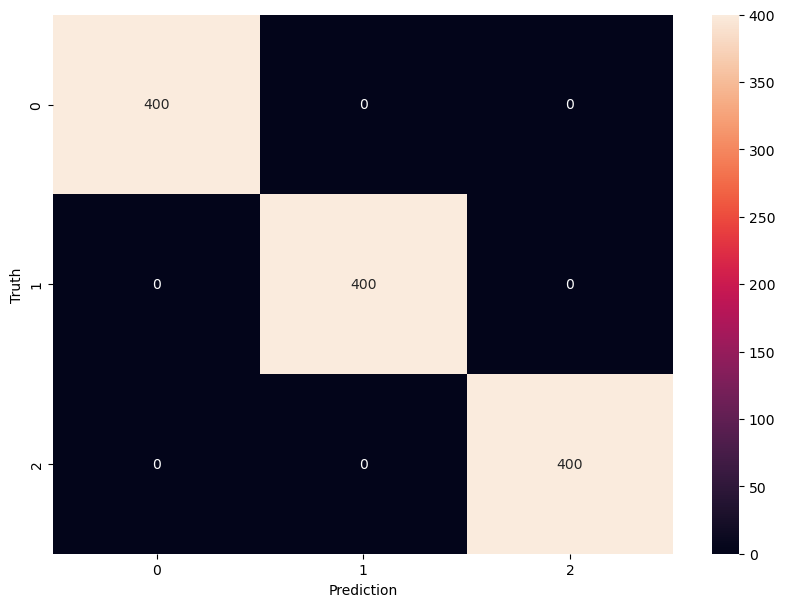

In [26]:
# Plot confusion matrix
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<font size =3> Make some predictions below </font>

In [30]:
y_pred_1 = clf.predict(["When does your Thanksgiving sale start this year?"])

print(y_pred_1)

[0]


In [32]:
y_pred_1 = clf.predict(["I would like to add lavender shower steamers to my order 1234"])

print(y_pred_1)

[1]


In [34]:
y_pred_1 = clf.predict(["Credit card charged twice"])

print(y_pred_1)

[2]
